In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '7'

In [3]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [4]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *

In [10]:
PATH = '/home/ubuntu/Plant/data_seg/'

In [15]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n, val_pct=.20)
n, len(val_idxs)

(4750, 950)

In [16]:
torch.cuda.device_count()
#torch.cuda.set_device(7)
#torch.cuda.current_device()

8

In [17]:
f_model = resnet50
sz=64
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

In [18]:
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}labels.csv',
                                    tfms=tfms, val_idxs=val_idxs, test_name='test',  bs=64)

In [19]:
learn = ConvLearner.pretrained(f_model, data, precompute=True)
learn.models.model = torch.nn.DataParallel(learn.models.model,device_ids=list(range(0,8)))

100%|██████████| 13/13 [00:00<00:00, 13.17it/s]


A Jupyter Widget

 88%|████████▊ | 53/60 [00:01<00:00, 51.87it/s, loss=11.5]


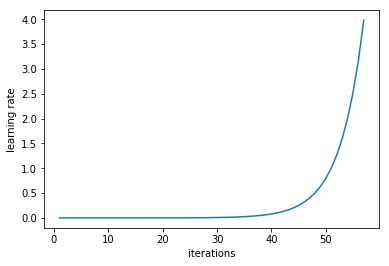

In [20]:
lrf=learn.lr_find()
learn.sched.plot_lr()

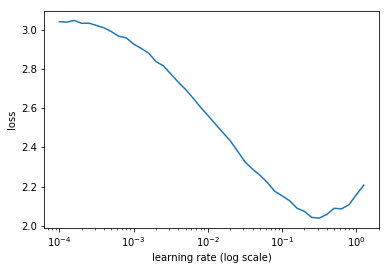

In [21]:
learn.sched.plot()

In [22]:
learn.precompute=False
lr = 1e-1
learn.fit(lr, 3, cycle_len=1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                 
    0      1.646134   0.796405   0.715394  
    1      1.436921   0.694283   0.765201                 
    2      1.23351    0.648296   0.774576                 



[0.64829612, 0.77457561890284221]

In [23]:
learn.unfreeze()
lr=np.array([lr/18,lr/6,lr/2])
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                 
    0      1.916429   1.458359   0.534491  
    1      1.434205   0.776254   0.737269                 
    2      1.282925   0.789155   0.721065                 
    3      1.078659   0.572726   0.812654                 
    4      0.896027   0.47635    0.855941                  
    5      0.789873   0.471421   0.857639                  
    6      0.838839   0.649895   0.795988                  
    7      0.77277    0.680799   0.765586                  
    8      0.68471    0.475758   0.830748                  
    9      0.639293   0.412393   0.865972                  
    10     0.538428   0.300963   0.890702                  
    11     0.50691    0.297793   0.896103                  
    12     0.463097   0.279351   0.902353                  
    13     0.439946   0.294842   0.892978                  



[0.29484224, 0.89297839403152468]

In [24]:
learn.save(f'resnet_50_all_{sz}')

# Size 128

In [25]:
learn.load(f'resnet_50_all_64')

In [27]:
sz=128
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}labels.csv',
                                    tfms=tfms, val_idxs=val_idxs, test_name='test',  bs=64)

In [28]:
learn.precompute=False
lr = 1e-1
learn.fit(lr, 3, cycle_len=1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                  
    0      1.161629   0.685884   0.789545  
    1      1.057434   0.569084   0.802701                 
    2      0.929771   0.483566   0.843248                  



[0.48356649, 0.84324845870335896]

In [29]:
learn.unfreeze()
lr=np.array([lr/18,lr/6,lr/2])
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                  
    0      0.69195    0.397486   0.865046  
    1      0.619502   0.377387   0.882176                  
    2      0.576794   0.371745   0.872801                  
    3      0.536344   0.313308   0.892978                  
    4      0.503003   0.289659   0.914005                  
    5      0.473718   0.29158    0.900077                  
    6      0.492003   0.295077   0.90027                   
    7      0.491501   0.33218    0.885301                  
    8      0.470877   0.287945   0.902353                  
    9      0.416841   0.273183   0.903202                  
    10     0.40797    0.272069   0.89402                   
    11     0.376734   0.255442   0.907755                  
    12     0.363826   0.24104    0.914005                  
    13     0.369678   0.249794   0.900463                  



[0.24979439, 0.90046296119689939]

In [30]:
learn.save(f'resnet_50_all_128')

# Size 250

In [31]:
learn.load(f'resnet_50_all_128')

In [32]:
sz=250
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}labels.csv',
                                    tfms=tfms, val_idxs=val_idxs, test_name='test',  bs=64)

In [33]:
learn.precompute=False
lr = 1e-1
learn.fit(lr, 3, cycle_len=1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                  
    0      0.716039   0.433353   0.842863  
    1      1.054804   0.674095   0.781404                  
    2      0.947242   0.541675   0.823727                  



[0.54167503, 0.82372685273488366]

In [42]:
learn.unfreeze()
lr=np.array([lr/18,lr/6,lr/2])
learn.fit(lr, 3, cycle_len=2, cycle_mult=4)

A Jupyter Widget

  0%|          | 0/60 [00:00<?, ?it/s]


TypeError: add_ received an invalid combination of arguments - got (numpy.ndarray, torch.cuda.FloatTensor), but expected one of:
 * (float value)
 * (torch.cuda.FloatTensor other)
 * (torch.cuda.sparse.FloatTensor other)
 * (float value, torch.cuda.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m, [32;1mtorch.cuda.FloatTensor[0m)
 * (float value, torch.cuda.sparse.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m, [31;1mtorch.cuda.FloatTensor[0m)


In [35]:
learn.save(f'resnet_50_all_250')

# Training Accuracy

In [36]:
preds,y = learn.TTA()
mean_logpreds = np.mean(preds, 0)
max_preds = np.argmax(mean_logpreds, 1)

In [37]:
def metrics(y, yhat, plot=False):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, yhat)
    f1 = f1_score(y, yhat, average='macro')
    acc = accuracy_score(y, yhat)

    if plot:
        plt.matshow(cm)
    return f1, acc, cm

(0.87024846462766492,
 0.91052631578947374,
 array([[  5,   0,   0,   0,   3,   0,  38,   0,   0,   0,   0,   0],
        [  0,  84,   4,   0,   0,   0,   0,   0,   0,   1,   1,   0],
        [  0,   6,  39,   0,   0,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 120,   0,   0,   0,   1,   1,   0,   0,   0],
        [  1,   0,   0,   0,  41,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   1,   1,   1,  89,   0,   0,   0,   0,   0,   1],
        [  4,   0,   0,   0,   1,   0, 124,   1,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0,   0,   2,  51,   0,   0,   0,   0],
        [  0,   2,   0,   1,   1,   0,   0,   0,  89,   0,   0,   0],
        [  0,   1,   0,   1,   0,   0,   0,   0,   2,  44,   0,   0],
        [  0,   0,   0,   0,   0,   1,   1,   0,   0,   0, 101,   0],
        [  0,   0,   0,   0,   1,   0,   1,   3,   0,   0,   0,  78]]))

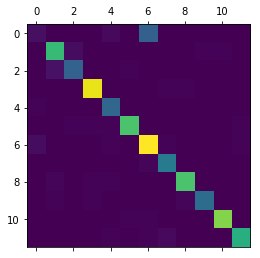

In [38]:
metrics(y, max_preds, True)

# Test Predictions

In [39]:
log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(794, 12)

In [40]:
max_preds = np.argmax(log_preds_test, 1)

In [41]:
preds_classes = [data.classes[i].replace("_", " ") for i in max_preds]
submission = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': preds_classes})
submission.to_csv(PATH + 'submission_resnet_sz.csv', index=False)